In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
net_dataset = pd.read_csv('/content/drive/MyDrive/Netflix dataset/Copy of combined_data_1.txt.zip',header = None,names =['Cust_Id',"Rating"],usecols =[0,1])

In [5]:
net_dataset

Cust_Id  Rating
0              1:     NaN
1         1488844     3.0
2          822109     5.0
3          885013     4.0
4           30878     4.0
...           ...     ...
24058258  2591364     2.0
24058259  1791000     2.0
24058260   512536     5.0
24058261   988963     3.0
24058262  1704416     3.0

[24058263 rows x 2 columns]

In [6]:
movie_count = net_dataset.isnull().sum()
movie_count = movie_count['Rating']
print('Total no. of moviee counts')
movie_count

Total no. of moviee counts


4499

In [7]:
total_count = net_dataset['Cust_Id'].nunique()
total_count

475257

In [8]:
customer_count = total_count - movie_count
print('Total no. of value counts')
customer_count

Total no. of value counts


470758

In [9]:
rating_count = net_dataset['Cust_Id'].count() - movie_count
print('Total no. of rating counts')
rating_count

Total no. of rating counts


24053764

In [10]:
stars = net_dataset.groupby("Rating")['Rating'].agg(['count'])
print('No. of stars ')
stars

No. of stars 


count
Rating         
1.0     1118186
2.0     2439073
3.0     6904181
4.0     8085741
5.0     5506583

Text(0.5, 1.0, 'Total Movie: 4499, Total Customers: 470758, Total no.of ratings: 24053764')

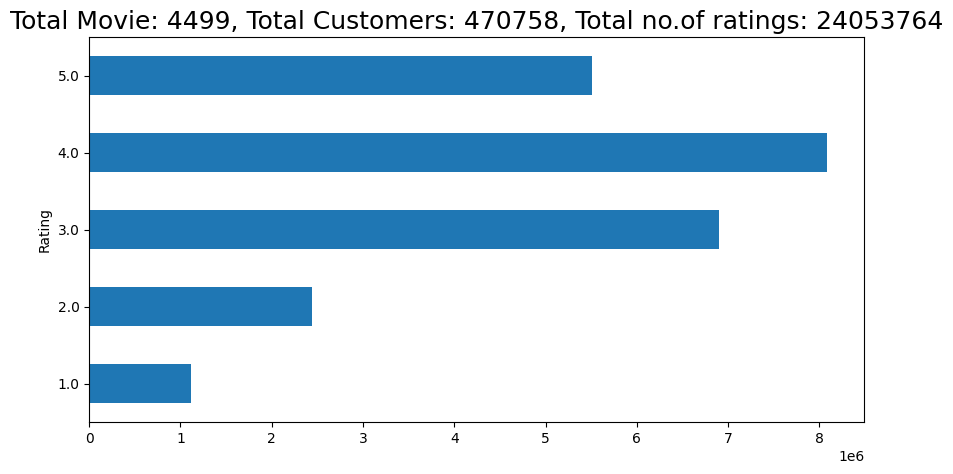

In [11]:
ax =  stars.plot(kind = 'barh',legend = False,figsize =(10,5))
plt.title(f'Total Movie: {movie_count}, Total Customers: {customer_count}, Total no.of ratings: {rating_count}', fontsize = 18)

In [12]:
movie_id = None
movie_np =[]

for i in net_dataset['Cust_Id']:
  if ':' in i:
    movie_id = int(i.replace(":",''))
  movie_np.append(movie_id)

In [13]:
net_dataset['Movie_Id'] = movie_np

In [14]:
net_dataset = net_dataset[net_dataset['Rating'].notna()]
net_dataset

Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
2          822109     5.0         1
3          885013     4.0         1
4           30878     4.0         1
5          823519     3.0         1
...           ...     ...       ...
24058258  2591364     2.0      4499
24058259  1791000     2.0      4499
24058260   512536     5.0      4499
24058261   988963     3.0      4499
24058262  1704416     3.0      4499

[24053764 rows x 3 columns]

In [15]:
net_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [16]:
net_dataset['Cust_Id'] = net_dataset['Cust_Id'].astype(int)

/tmp/ipython-input-16-4218081816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_dataset['Cust_Id'] = net_dataset['Cust_Id'].astype(int)


In [17]:
net_dataset['Movie_Id'].value_counts()

Movie_Id
1905    193941
2152    162597
3860    160454
4432    156183
571     154832
         ...  
4294        44
915         43
3656        42
4338        39
4362        36
Name: count, Length: 4499, dtype: int64

In [18]:
dataset_movie_summary = net_dataset.groupby("Movie_Id")['Rating'].agg(['count'])
print('No. of ratings for each movie')
dataset_movie_summary

No. of ratings for each movie


count
Movie_Id       
1           547
2           145
3          2012
4           142
5          1140
...         ...
4495        614
4496       9519
4497        714
4498        269
4499        428

[4499 rows x 1 columns]

In [19]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.6),0) # Setting benchmark
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
print('Movie minimum ratings to be considered',movie_benchmark)

Movie minimum ratings to be considered 908.0


In [20]:
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [21]:
datase_cust_summary = net_dataset.groupby("Cust_Id")['Rating'].agg(['count'])
print('No. of ratings for each customer')
datase_cust_summary

No. of ratings for each customer


count
Cust_Id       
6          153
7          195
8           21
10          49
25           4
...        ...
2649404     12
2649409     10
2649421      3
2649426     74
2649429     62

[470758 rows x 1 columns]

In [22]:
cust_benchmark = round(datase_cust_summary['count'].quantile(0.6),0) # Setting benchmark
drop_cust_list = datase_cust_summary[datase_cust_summary['count'] < cust_benchmark].index
print('Customer minimum ratings to be considered',cust_benchmark)

Customer minimum ratings to be considered 36.0


In [23]:
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [24]:
net_dataset = net_dataset[~net_dataset['Movie_Id'].isin(drop_movie_list)]
net_dataset = net_dataset[~net_dataset['Cust_Id'].isin(drop_cust_list)]

In [25]:
net_dataset

Cust_Id  Rating  Movie_Id
696        712664     5.0         3
697       1331154     4.0         3
698       2632461     3.0         3
699         44937     5.0         3
700        656399     4.0         3
...           ...     ...       ...
24056842  1055714     5.0      4496
24056843  2643029     4.0      4496
24056844   267802     4.0      4496
24056845  1559566     3.0      4496
24056846   293198     3.0      4496

[19695836 rows x 3 columns]

In [26]:
df_title = pd.read_csv('/content/drive/MyDrive/Netflix dataset/Copy of movie_titles.csv',encoding = 'ISO-8859-1',header = None,names = ['Movie_Id','Year','Name'],usecols =[0,1,2])

In [27]:
df_title

Movie_Id    Year                                               Name
0             1  2003.0                                    Dinosaur Planet
1             2  2004.0                         Isle of Man TT 2004 Review
2             3  1997.0                                          Character
3             4  1994.0                       Paula Abdul's Get Up & Dance
4             5  2004.0                           The Rise and Fall of ECW
...         ...     ...                                                ...
17765     17766  2002.0  Where the Wild Things Are and Other Maurice Se...
17766     17767  2004.0                  Fidel Castro: American Experience
17767     17768  2000.0                                              Epoch
17768     17769  2003.0                                        The Company
17769     17770  2003.0                                       Alien Hunter

[17770 rows x 3 columns]

In [28]:
# import subprocess
# import os
# import sys
# def install_surprise_fix():
#       try:
# #         # Step 1: Uninstall NumPy and scikit-surprise
#         print("Uninstalling existing NumPy and scikit-surprise...")
#         subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "-y", "numpy", "scikit-surprise"])
# #         # Step 2: Install a compatible NumPy version (1.23.5)
#         print("Installing NumPy 1.23.5...")
#         subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy==1.23.5"])
# #         # Step 3: Install scikit-surprise without cache
#         print("Installing scikit-surprise...")
#         subprocess.check_call([sys.executable, "-m", "pip", "install", "--no-cache-dir", "scikit-surprise"])
# #         # Step 4: Restart kernel (for Jupyter or Colab)
#         print("Restarting kernel to apply changes...")
#         os._exit(0) # Force restart in Jupyter/Colab

#       except Exception as e:
#            print(f"Error: {e}")
# install_surprise_fix()

In [29]:
!pip install sckit-surprise

ERROR: Could not find a version that satisfies the requirement sckit-surprise (from versions: none)
ERROR: No matching distribution found for sckit-surprise


In [30]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [31]:
reader = Reader()

In [32]:
data = Dataset.load_from_df(net_dataset[['Cust_Id','Movie_Id','Rating']][:100000],reader)

In [33]:
data

In [34]:
model = SVD()

In [35]:
cross_validate(model,data,measures = ['RMSE'],cv = 3)

{'test_rmse': array([1.01549179, 1.02090935, 1.02056649]),
 'fit_time': (1.4264860153198242, 1.5027427673339844, 3.263856887817383),
 'test_time': (0.2020125389099121, 0.24269795417785645, 1.158167839050293)}

In [36]:
net_dataset

Cust_Id  Rating  Movie_Id
696        712664     5.0         3
697       1331154     4.0         3
698       2632461     3.0         3
699         44937     5.0         3
700        656399     4.0         3
...           ...     ...       ...
24056842  1055714     5.0      4496
24056843  2643029     4.0      4496
24056844   267802     4.0      4496
24056845  1559566     3.0      4496
24056846   293198     3.0      4496

[19695836 rows x 3 columns]

In [37]:
user_rating = net_dataset[net_dataset['Cust_Id'] == 1331154]

In [38]:
user_rating

Cust_Id  Rating  Movie_Id
697       1331154     4.0         3
5178      1331154     4.0         8
31460     1331154     3.0        18
92840     1331154     4.0        30
224761    1331154     3.0        44
...           ...     ...       ...
23439584  1331154     4.0      4389
23546489  1331154     2.0      4402
23649431  1331154     4.0      4432
23844441  1331154     3.0      4472
23985561  1331154     4.0      4488

[253 rows x 3 columns]

In [39]:
user_1331154 = df_title.copy()

In [40]:
user_1331154 = user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]

In [41]:
user_1331154['Estimated rating'] = user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154,x).est)

In [42]:
user_1331154

Movie_Id    Year                                               Name  \
2             3  1997.0                                          Character   
4             5  2004.0                           The Rise and Fall of ECW   
5             6  1997.0                                               Sick   
7             8  2004.0                         What the #$*! Do We Know!?   
15           16  1996.0                                          Screamers   
...         ...     ...                                                ...   
17765     17766  2002.0  Where the Wild Things Are and Other Maurice Se...   
17766     17767  2004.0                  Fidel Castro: American Experience   
17767     17768  2000.0                                              Epoch   
17768     17769  2003.0                                        The Company   
17769     17770  2003.0                                       Alien Hunter   

       Estimated rating  
2              3.831362  
4              4.137124  
5              2.911971  
7              3.621116  
15             3.101147  
...                 ...  
17765          3.642096  
17766          3.642096  
17767          3.642096  
17768          3.642096  
17769          3.642096  

[15071 rows x 4 columns]

In [43]:
user_1331154 = user_1331154.sort_values('Estimated rating',ascending = False)

In [44]:
user_1331154

Movie_Id    Year                                           Name  \
27        28  2002.0                                Lilo and Stitch   
29        30  2003.0                         Something's Gotta Give   
4          5  2004.0                       The Rise and Fall of ECW   
24        25  1997.0  Inspector Morse 31: Death Is Now My Neighbour   
2          3  1997.0                                      Character   
..       ...     ...                                            ...   
17        18  1994.0                               Immortal Beloved   
15        16  1996.0                                      Screamers   
23        24  1981.0                            My Bloody Valentine   
5          6  1997.0                                           Sick   
16        17  2005.0                                      7 Seconds   

    Estimated rating  
27          4.187816  
29          4.150925  
4           4.137124  
24          4.065218  
2           3.831362  
..               ...  
17          3.398590  
15          3.101147  
23          2.978640  
5           2.911971  
16          2.641766  

[15071 rows x 4 columns]